### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

### Reading Dataset

In [2]:
df = pd.read_csv("kc_house_data.csv")

### First 5 rows of Dataset

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Information about Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Datatype of each columns using dtypes

In [5]:
for i in df.columns:
    print(i ," : ", df[i].dtypes)

id  :  int64
date  :  object
price  :  float64
bedrooms  :  int64
bathrooms  :  float64
sqft_living  :  int64
sqft_lot  :  int64
floors  :  float64
waterfront  :  int64
view  :  int64
condition  :  int64
grade  :  int64
sqft_above  :  int64
sqft_basement  :  int64
yr_built  :  int64
yr_renovated  :  int64
zipcode  :  int64
lat  :  float64
long  :  float64
sqft_living15  :  int64
sqft_lot15  :  int64


### Dropping "id" column

In [6]:
df.drop("id", axis = 1, inplace = True)

### Statistic summary of dataset

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Counting the number of houses with unique floor

In [8]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Boxplot to find outliers of waterfront view and with no waterfront view against price

<AxesSubplot: xlabel='waterfront', ylabel='price'>

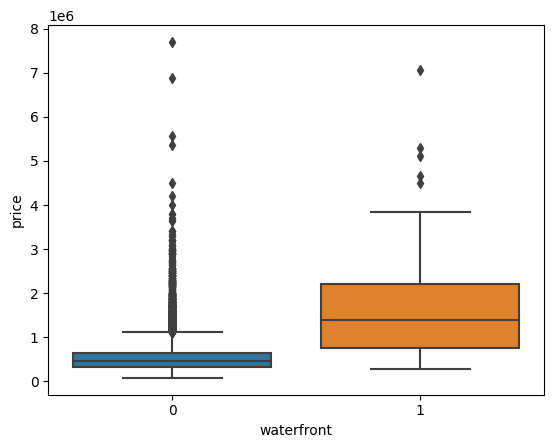

In [9]:
sns.boxplot(x = df["waterfront"], y = df["price"])

### Regplot to determine whether "sqft_above" is +ve or -ve correlated with price

<AxesSubplot: xlabel='sqft_above', ylabel='price'>

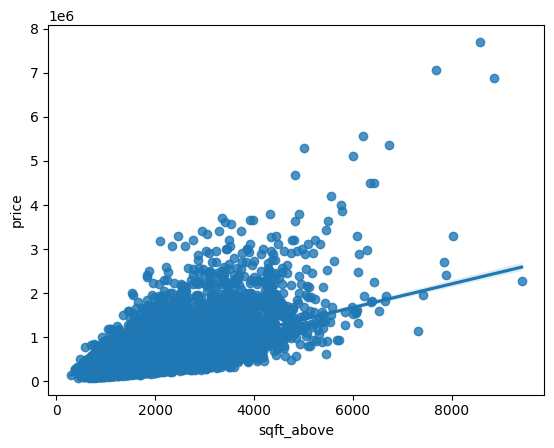

In [10]:
sns.regplot(x = "sqft_above", 
            y = "price",
            data = df)

### Linear Regression model Prediction and R^2 score

In [11]:
# Creating and fitting the dataset in model
linear = LinearRegression()
X = df[["sqft_living"]]
y = df["price"]
linear.fit(X, y)

# Prediction of model
y_pred = linear.predict(X)
y_pred

array([287555.06702452, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [12]:
# R squared value of model 
rsqare_score = linear.score(X, y)
print("R squared value of Linear Regression is", rsqare_score)

R squared value of Linear Regression is 0.4928532179037931


In [13]:
# Columns 
col = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", 
        "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]

### Multiple Linear Regression model and R^2 score

In [14]:
# Creating and fitting the dataset in model
linear = LinearRegression()
linear.fit(col, df["price"])
col_pred = linear.predict(col)
col_pred

array([283413.07663026, 662377.84349022, 305956.87442533, ...,
       304309.00758749, 428626.84540525, 304107.0978988 ])

In [15]:
# R squared value of model 
r2_score = linear.score(col, y)
print("R squared value of Multiple Linear Regression is", r2_score)

R squared value of Multiple Linear Regression is 0.6577151058279326


### Creating a Pipeline of Scaler, Polynomial Features and Linear Regression

In [16]:
# Creating a Pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree = 2)),('mode', LinearRegression())]
pipe = Pipeline(Input)

In [17]:
# R_squared value of Pipeline
pipe.fit(col, df["price"])
pipe_score = pipe.score(col, df["price"])
print("R squared value of Pipeline is", pipe_score)

R squared value of Pipeline is 0.7438738969751628


### Ridge Regression model prediction and R^2 score

In [18]:
# Ridge Regression model
x_train, x_test, y_train, y_test = train_test_split(col, df["price"], test_size =0.25, random_state = 0) 
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
ridge_score= ridge_model.score(x_test, y_test)
print("R squared value of Ridge Regression model is", ridge_score)

R squared value of Ridge Regression model is 0.6457148015088421


### Polynomial transform and Ridge Regression model

In [19]:
# Performing second order polynomial transformation on dataset
poly_feat = PolynomialFeatures(degree=2)
data_x = poly_feat.fit_transform(col)
data_y = poly_feat.fit_transform(df[["price"]])

# Splitting into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size =0.25, random_state = 0)

# Ridge Regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
print("R squared value is", ridge.score(x_test, y_test))

R squared value is 0.7748729393943824
